In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import io

In [3]:
df= pd.read_csv("preprocessed_5.csv", encoding ='UTF8')

1. 담보(코드, 그룹코드) 구성 치아 : A95, MGG_GRP_CD(보험담보그룹코드) A95 > MGG_CD (보험담보코드) A95~

In [4]:
df_dental = df[df["INS_GBN_CD"] == 8] 
df_dental

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
46,537789,1,1973,2,1,50,3,5460366,320238,11,...,202001,202501,18,2,5,1,A95,A9500,1,100
47,537789,1,1973,2,1,50,3,5460366,320238,11,...,202001,202501,18,2,5,1,A95,A9509,1,800
48,537789,1,1973,2,1,50,3,5460366,320238,11,...,202001,202501,18,2,5,1,A95,A9599,1,240
374,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,201505,202505,13,2,5,1,A95,A9500,1,100
375,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,201505,202505,13,2,5,1,A95,A9599,1,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544183,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,201711,202711,31,2,10,6,A95,A9599,1,660
544184,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,201711,202711,31,2,10,6,A6,A6999,1,100
544191,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,201807,202807,12,2,10,6,A95,A9599,1,440
544192,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,201807,202807,12,2,10,6,A95,A9500,6,200


2. 납입주기코드 연납.월납.일시납 중 뭐가 많은지 확인 (비율부터) 02:매월납(7676) , 03:년납(40)

In [5]:
df_dental.groupby("CT_PY_CYCLE_CD").count()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
CT_PY_CYCLE_CD,,,,,,,,,,,,,,,,,,,,,
2,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676,...,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676
3,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40


In [87]:
# 종기에서 시기 년 필요하죵 ! 
df_dental.groupby("CT_END_DT").count()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,Age_category,AGE,SCTR_CD,COM_SN,POL_SN,...,CT_ST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
CT_END_DT,,,,,,,,,,,,,,,,,,,,,
202201,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
202202,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
202203,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
202204,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
202205,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203002,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
203003,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
203004,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


3. 가장 많은 거 빼고 나머지 레코드 다 지우기

In [6]:
df_dental = df_dental[df_dental["CT_PY_CYCLE_CD"] == 2] #7676 rows × 22 columns

4. 종기월 - 시기월 => 보장기간의 비율을 어떠한지
기존 테이블에 새로운 열 붙이는 방법으로 해보기!
나이도 기존 테이블에 새로운 열 붙이는 방법으로 해보기!

In [88]:
df['CT_PD'] = (df['CT_END_DT'] - df['CT_ST_DT']).dt.days

AttributeError: Can only use .dt accessor with datetimelike values

In [8]:
def period(x):
    period = x / 100
    return period

In [9]:
PERIOD = (df_dental["CT_END_DT"] - df_dental["CT_ST_DT"]).apply(period)

PERIOD 

46         5.0
47         5.0
48         5.0
374       10.0
375       10.0
          ... 
544183    10.0
544184    10.0
544191    10.0
544192    10.0
544193    10.0
Length: 7676, dtype: float64

In [10]:
df_dental.insert(22, 'PERIOD', PERIOD)
df_dental

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
46,537789,1,1973,2,1,50,3,5460366,320238,11,...,202501,18,2,5,1,A95,A9500,1,100,5.0
47,537789,1,1973,2,1,50,3,5460366,320238,11,...,202501,18,2,5,1,A95,A9509,1,800,5.0
48,537789,1,1973,2,1,50,3,5460366,320238,11,...,202501,18,2,5,1,A95,A9599,1,240,5.0
374,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,202505,13,2,5,1,A95,A9500,1,100,10.0
375,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,202505,13,2,5,1,A95,A9599,1,240,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544183,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,202711,31,2,10,6,A95,A9599,1,660,10.0
544184,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,202711,31,2,10,6,A6,A6999,1,100,10.0
544191,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,202807,12,2,10,6,A95,A9599,1,440,10.0
544192,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,202807,12,2,10,6,A95,A9500,6,200,10.0


In [11]:
# row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# col 생략 없이 출력
# pd.set_option('display.max_columns', None)

df_dental.PERIOD.describe()
df_dental.groupby("PERIOD").count()  



,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
PERIOD,,,,,,,,,,,,,,,,,,,,,
3.0,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
5.0,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,...,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940
6.0,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
7.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
8.0,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
65.0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
66.0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


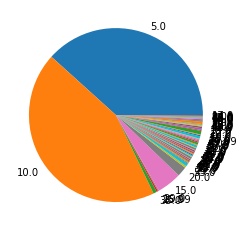

In [12]:
# 치과 보장기간 비율 
df_group = df_dental.groupby("PERIOD").count()

PERIOD_arr = []
labels=[]
for i in df_dental.PERIOD.unique():
    PERIOD_arr.append(df_group["JOIN_SN"][i])
    labels.append(i)
plt.pie(PERIOD_arr, labels=labels)
plt.show()

In [13]:
# 10년 보장만 가져오기
df_dental = df_dental[df_dental["PERIOD"] == 10]
df_dental

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
374,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,202505,13,2,5,1,A95,A9500,1,100,10.0
375,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,202505,13,2,5,1,A95,A9599,1,240,10.0
376,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,202505,13,2,5,1,A95,A9509,1,800,10.0
697,1195073,1,1979,2,1,44,8,3193547,661419,22,...,202704,43,2,10,3,A95,A9500,1,360,10.0
815,1769251,1,1970,1,1,53,6,5936495,2649319,34,...,202804,52,2,10,6,A5,A5999,1,100,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544183,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,202711,31,2,10,6,A95,A9599,1,660,10.0
544184,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,202711,31,2,10,6,A6,A6999,1,100,10.0
544191,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,202807,12,2,10,6,A95,A9599,1,440,10.0
544192,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,202807,12,2,10,6,A95,A9500,6,200,10.0


In [14]:
# 치과,10년보장,월납입의 보험료 분포는?
df_dental.groupby("CT_PY_AMT").count()  

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_ST_DT,CT_END_DT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
CT_PY_AMT,,,,,,,,,,,,,,,,,,,,,
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
6,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
92,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
95,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


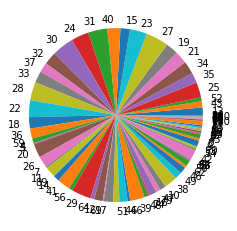

In [15]:
df1_group = df_dental.groupby("CT_PY_AMT").count()

CT_PY_AMT_arr = []
labels=[]
for i in df_dental.CT_PY_AMT.unique():
    CT_PY_AMT_arr.append(df1_group["JOIN_SN"][i])
    labels.append(i)
plt.pie(CT_PY_AMT_arr, labels=labels)
plt.show()

In [17]:
# 월 납입료 평균값은? (10년) , 31,000원
mean_df = df_dental['CT_PY_AMT'].mean()
print(mean_df)

31.75564803804994


In [31]:
# 연령대 조사
# 연령별나누기 10대 이상만
cond = df_dental.AGE >= 10
cond

374       True
375       True
376       True
697       True
815       True
          ... 
544183    True
544184    True
544191    True
544192    True
544193    True
Name: AGE, Length: 3364, dtype: bool

In [32]:
# 연령대 나누기 함수
def age_categorize(age):
    age = (age //10 ) * 10
    return age

In [33]:
Age_category = df_dental.AGE.apply(age_categorize)
Age_category

374       20
375       20
376       20
697       40
815       50
          ..
544183    30
544184    30
544191    30
544192    30
544193    30
Name: AGE, Length: 3364, dtype: int64

In [34]:
Age_category = Age_category.astype('category')
Age_category

374       20
375       20
376       20
697       40
815       50
          ..
544183    30
544184    30
544191    30
544192    30
544193    30
Name: AGE, Length: 3364, dtype: category
Categories (8, int64): [10, 20, 30, 40, 50, 60, 70, 80]

In [37]:
df_dental.insert(5, 'Age_category', Age_category)
df_dental

ValueError: cannot insert Age_category, already exists

In [41]:
# 연령대 갯수
df_dental.groupby("Age_category").count()  

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
Age_category,,,,,,,,,,,,,,,,,,,,,
10,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
20,456,456,456,456,456,456,456,456,456,456,...,456,456,456,456,456,456,456,456,456,456
30,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042,...,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042
40,761,761,761,761,761,761,761,761,761,761,...,761,761,761,761,761,761,761,761,761,761
50,566,566,566,566,566,566,566,566,566,566,...,566,566,566,566,566,566,566,566,566,566
60,341,341,341,341,341,341,341,341,341,341,...,341,341,341,341,341,341,341,341,341,341
70,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
80,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


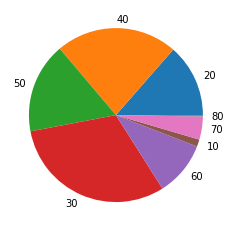

In [40]:
# 연령대별 그래프 (비율) 얼마나 많은지
df_age_group = df_dental.groupby("Age_category").count()

Age_category_arr = []
labels=[]
for i in df_dental.Age_category.unique():
    Age_category_arr.append(df_age_group["JOIN_SN"][i])
    labels.append(i)
plt.pie(Age_category_arr, labels=labels)
plt.show()

In [42]:
# 성별 
df_dental.groupby("GENDER").count()  

,JOIN_SN,JOIN_SN_TYP,BTH_YR,IS_KRN,Age_category,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
GENDER,,,,,,,,,,,,,,,,,,,,,
1,1758,1758,1758,1758,1758,1758,1758,1758,1758,1758,...,1758,1758,1758,1758,1758,1758,1758,1758,1758,1758
2,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,...,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606


In [43]:
# 담보비율
df_dental.groupby("MGG_GRP_CD").count()  
# 사망, 후유장애(정액), 진단(정액), 수술(정액), 입원(정액), 통원(정액), 위로금(정액), 치과치료(정액), 기타(정액)

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,Age_category,AGE,SCTR_CD,COM_SN,POL_SN,...,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
MGG_GRP_CD,,,,,,,,,,,,,,,,,,,,,
A1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
A3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
A4,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
A5,398,398,398,398,398,398,398,398,398,398,...,398,398,398,398,398,398,398,398,398,398
A6,316,316,316,316,316,316,316,316,316,316,...,316,316,316,316,316,316,316,316,316,316
A7,161,161,161,161,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161
A94,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
A95,2383,2383,2383,2383,2383,2383,2383,2383,2383,2383,...,2383,2383,2383,2383,2383,2383,2383,2383,2383,2383
A96,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


In [47]:
df_d = df_dental.copy()
# 치과 치료에서 보장 많은 순서
df_d = df_d[df_d['MGG_GRP_CD'] == 'A95']
df_d.groupby("MGG_CD").count() 
# 치과치료(보존치료), 치과치료(보철치료), 기타치과담보

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,Age_category,AGE,SCTR_CD,COM_SN,POL_SN,...,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
MGG_CD,,,,,,,,,,,,,,,,,,,,,
A9500,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,...,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316
A9509,874,874,874,874,874,874,874,874,874,874,...,874,874,874,874,874,874,874,874,874,874
A9599,193,193,193,193,193,193,193,193,193,193,...,193,193,193,193,193,193,193,193,193,193


In [49]:
df_d2 = df_dental.copy()
# 치과보험 전체 보장에서 담보 비율 차지하는 크기
df_d2.groupby("MGG_CD").count() 

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,Age_category,AGE,SCTR_CD,COM_SN,POL_SN,...,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
MGG_CD,,,,,,,,,,,,,,,,,,,,,
A1100,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
A1300,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
A3301,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
A4299,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
A4301,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
A4399,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
A5100,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
A5300,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
A5999,373,373,373,373,373,373,373,373,373,373,...,373,373,373,373,373,373,373,373,373,373


In [50]:
df_d3 = df.copy()
df_d3 = df_d3[df_d3['MGG_GRP_CD'] == 'A95']
df_d3.groupby("MGG_CD").count() 

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CNT,MGG_AMT_SUM
MGG_CD,,,,,,,,,,,,,,,,,,,,,
A9500,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,...,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192
A9509,2737,2737,2737,2737,2737,2737,2737,2737,2737,2737,...,2737,2737,2737,2737,2737,2737,2737,2737,2737,2737
A9599,971,971,971,971,971,971,971,971,971,971,...,971,971,971,971,971,971,971,971,971,971


In [51]:
df_dental

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,Age_category,AGE,SCTR_CD,COM_SN,POL_SN,...,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
374,1386093,1,2000,2,1,20,23,3,4626782,1365062,...,202505,13,2,5,1,A95,A9500,1,100,10.0
375,1386093,1,2000,2,1,20,23,3,4626782,1365062,...,202505,13,2,5,1,A95,A9599,1,240,10.0
376,1386093,1,2000,2,1,20,23,3,4626782,1365062,...,202505,13,2,5,1,A95,A9509,1,800,10.0
697,1195073,1,1979,2,1,40,44,8,3193547,661419,...,202704,43,2,10,3,A95,A9500,1,360,10.0
815,1769251,1,1970,1,1,50,53,6,5936495,2649319,...,202804,52,2,10,6,A5,A5999,1,100,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544183,1225148,1,1989,2,1,30,34,6,6823861,4486972,...,202711,31,2,10,6,A95,A9599,1,660,10.0
544184,1225148,1,1989,2,1,30,34,6,6823861,4486972,...,202711,31,2,10,6,A6,A6999,1,100,10.0
544191,1225148,1,1989,2,1,30,34,6,6823861,1664157,...,202807,12,2,10,6,A95,A9599,1,440,10.0
544192,1225148,1,1989,2,1,30,34,6,6823861,1664157,...,202807,12,2,10,6,A95,A9500,6,200,10.0


In [54]:
# 연령대/성별별 납부 보험금 평균 구하기
# 성별 보험금 평균
df_dental.groupby('GENDER')['CT_PY_AMT'].agg(**{'mean_money':'mean'}).reset_index() ## 성별 평균키

,GENDER,mean_money
0,1,31.919795
1,2,31.575965


In [56]:
# 연령대별 평균 값, 
# 연령대별 보장기간 
df_dental.groupby('Age_category')['CT_PY_AMT'].agg(**{'mean_age_money':'mean'}).reset_index()

,Age_category,mean_age_money
0,10,23.466667
1,20,27.701754
2,30,28.361804
3,40,31.143233
4,50,39.072438
5,60,38.856305
6,70,29.951389
7,80,23.000000


In [64]:
# 연령대별 평균 보험료 
df_d.groupby('Age_category')[['CT_PY_AMT']].agg(['mean']) ## 여러 칼럼에 대한 집계

,CT_PY_AMT
,mean
Age_category,
10,23.571429
20,24.912752
30,27.265554
40,30.172285
50,38.981693
60,38.400000
70,31.125000
80,21.500000


<AxesSubplot:xlabel='Age_category'>

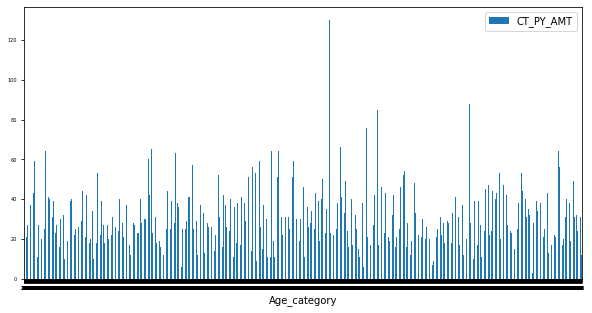

In [86]:
df_d.plot.bar(x='Age_category', y='CT_PY_AMT', rot=0, fontsize=5, figsize=(10,5))
# 없다면,,,다시 구글링으로 ㅎㅎㅎ  

In [65]:
# 납기
df_dental.groupby("CT_PY_PD").count() 

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,Age_category,AGE,SCTR_CD,COM_SN,POL_SN,...,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PERIOD
CT_PY_PD,,,,,,,,,,,,,,,,,,,,,
5,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
10,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172,...,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172


In [66]:
# 연령별 납기 평균
df_d.groupby('Age_category')[['CT_PY_PD']].agg(['mean']) ## 여러 칼럼에 대한 집계



,CT_PY_PD
,mean
Age_category,
10,9.761905
20,9.312081
30,9.484067
40,9.559925
50,9.816934
60,9.684211
70,10.000000
80,10.000000


In [79]:
df_d.groupby(['Age_category', 'GENDER'])['CT_PY_AMT', 'CT_PY_PD'].mean()

C:\Users\multicampus\AppData\Local\Temp\ipykernel_13380\2191317116.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_d.groupby(['Age_category', 'GENDER'])['CT_PY_AMT', 'CT_PY_PD'].mean()


CT_PY_AMT   CT_PY_PD
Age_category GENDER                      
10           1       19.500000   8.750000
             2       24.529412  10.000000
20           1       25.250000   9.250000
             2       24.685393   9.353933
30           1       27.803922   9.523810
             2       26.629139   9.437086
40           1       29.627907   9.468439
             2       30.875536   9.678112
50           1       39.704167   9.875000
             2       38.101523   9.746193
60           1       37.342657   9.650350
             2       39.464789   9.718310
70           1       31.131148  10.000000
             2       31.118644  10.000000
80           1       21.500000  10.000000
             2             NaN        NaN